In [3]:
import pandas as pd

# Load A/B test data
df = pd.read_csv('../data/google_ab_data.csv')

# View first few rows
df.head()



,fullVisitorId,visitId,visitStartTime,date,source,deviceCategory,country,pageviews,bounces,transactions,transactionRevenue
0,509972280802528263,1501621191,1501621191,20170801,(direct),desktop,United States,5,NaN,1,35290000
1,7771285007340524144,1501612542,1501612542,20170801,(direct),desktop,United States,11,NaN,1,27430000
2,4417987816137194149,1501599317,1501599317,20170801,(direct),desktop,United States,14,NaN,1,1990000
3,5835011534221003810,1501620679,1501620679,20170801,(direct),desktop,United States,14,NaN,1,13290000
4,24507252193437459,1501595478,1501595478,20170801,mail.google.com,desktop,United States,16,NaN,1,11960000


In [2]:
# Shape and basic info
print(df.shape)
df.info()

# Check for nulls
df.isnull().sum()

# Unique values in key columns
print(df['group'].unique())
print(df['landing_page'].unique())
print(df['converted'].value_counts())


NameError: name 'df' is not defined

In [4]:
import numpy as np

# Randomly assign A or B
np.random.seed(42)  # ensures repeatability
df['variant'] = np.random.choice(['A', 'B'], size=len(df))

# Preview the result
df['variant'].value_counts()
df.head()


,fullVisitorId,visitId,visitStartTime,date,source,deviceCategory,country,pageviews,bounces,transactions,transactionRevenue,variant
0,509972280802528263,1501621191,1501621191,20170801,(direct),desktop,United States,5,NaN,1,35290000,A
1,7771285007340524144,1501612542,1501612542,20170801,(direct),desktop,United States,11,NaN,1,27430000,B
2,4417987816137194149,1501599317,1501599317,20170801,(direct),desktop,United States,14,NaN,1,1990000,A
3,5835011534221003810,1501620679,1501620679,20170801,(direct),desktop,United States,14,NaN,1,13290000,A
4,24507252193437459,1501595478,1501595478,20170801,mail.google.com,desktop,United States,16,NaN,1,11960000,A


In [5]:
# Check variant counts
print(df['variant'].value_counts())

# Check for nulls in important columns
print(df[['transactions', 'transactionRevenue', 'variant']].isnull().sum())


variant
A    22
B    21
Name: count, dtype: int64
transactions          0
transactionRevenue    0
variant               0
dtype: int64


In [6]:
# Convert micro-units to dollars
df['revenue_dollars'] = df['transactionRevenue'] / 1e6

# Flag conversions
df['converted'] = df['transactions'] > 0

# Group by variant and aggregate
ab_summary = df.groupby('variant').agg(
    total_users=('fullVisitorId', 'count'),
    conversions=('converted', 'sum'),
    conversion_rate=('converted', 'mean'),
    total_revenue=('revenue_dollars', 'sum'),
    avg_revenue_per_user=('revenue_dollars', 'mean')
).round(3)

ab_summary


,total_users,conversions,conversion_rate,total_revenue,avg_revenue_per_user
variant,,,,,
A,22,22,1.0,5681.98,258.272
B,21,21,1.0,2622.96,124.903


In [7]:
from scipy.stats import ttest_ind

# Subset revenue by variant
revenue_A = df[df['variant'] == 'A']['revenue_dollars']
revenue_B = df[df['variant'] == 'B']['revenue_dollars']

# Perform independent t-test
t_stat, p_value = ttest_ind(revenue_A, revenue_B, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")


T-statistic: 0.929
P-value: 0.3615


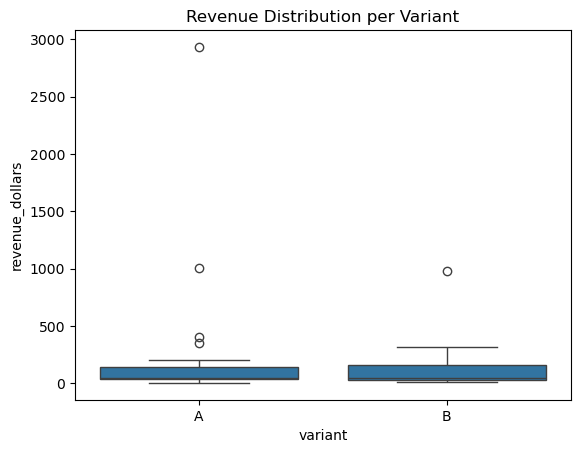

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='variant', y='revenue_dollars', data=df)
plt.title("Revenue Distribution per Variant")
plt.savefig('../visuals/conversion_revenue_plot.png')
plt.show()
